In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 1s 1us/step


In [2]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [4]:
# decoding.
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def decode(code):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in
        code])

print("Noticia 145: ", decode(train_data[145]))


Noticia 145:  ? a spokesman for unilever plc lt un as declined to comment on market rumours that it may be considering a bid for the u s health care group the gillette co lt ? n gillette shares are traded on the over the counter market in london and this morning stood one dollar higher at 38 dlrs in response to the bid speculation unilever dipped ? to 3 275 in a generally depressed u k market most analysts dismissed the rumours saying it was an old story and one commented that it was ? ? adding he thought unilever would not be interested in gillette gillette shares rose sharply at the beginning of the month on wall street rumours that sir james ? was building a stake in the company gillette has been the subject of repeated rumours since ronald perelman chairman of the revlon group inc lt rev made an unsuccessful bid for the company last year reuter 3


In [42]:
# Preprocessing
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_test.shape

(2246, 10000)

In [10]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [47]:
## Neural Network
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,), name="Layer1"))
model.add(layers.Dense(64, activation='relu', name="Layer2"))
model.add(layers.Dense(46, activation='softmax', name="Layer3"))

model.compile(optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])


In [48]:
# Validation Set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [49]:
# Training...
epochs = 20
history = model.fit(partial_x_train,
    partial_y_train,
    epochs=epochs,
    batch_size=512,
    validation_data=(x_val, y_val))



Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 180us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/20
7982/7982 [==============================] - 1s 88us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/20
7982/7982 [==============================] - 1s 90us/step - loss: 1.0136 - acc: 0.7783 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/20
7982/7982 [==============================] - 1s 84us/step - loss: 0.7975 - acc: 0.8255 - val_loss: 1.0540 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 84us/step - loss: 0.6391 - acc: 0.8627 - val_loss: 0.9752 - val_acc: 0.7920
Epoch 6/20
7982/7982 [==============================] - 1s 84us/step - loss: 0.5118 - acc: 0.8921 - val_loss: 0.9104 - val_acc: 0.8130
Epoch 7/20
7982/7982 [==============================] - 1s 89us/step - loss: 0.4119 - acc: 0.9146 - val_loss: 0.8919 - val_acc: 0.8210
Epoch 

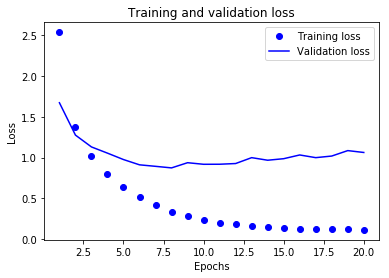

In [50]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

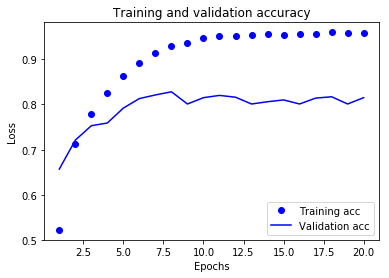

In [51]:

acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [52]:
label = model.predict_classes(x_test[45:46]) # Feo tener que ingresar así para evaluar un dato.
print("Label obtenido", label[0], "y label correcto", test_labels[45])

Label obtenido 4 y label correcto 4


In [54]:
# Testing set metrics.
test_loss, test_acc = model.evaluate(x_test, one_hot_test_labels)
test_acc


2246/2246 [==============================] - 0s 93us/step


0.7871772039180766